In [17]:
!pip install seaborn

  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)


In [54]:
def prod_plots(name1, key='eval_rew_mean'):
    from ray.tune import Analysis
    import pandas as pd
    import seaborn as sns
    import numpy as np
    analysis = Analysis('/home/smetzger/ray_results/' + name1)#pbt_alphavar_2_random_alpha_max_0.100)
    df = analysis.dataframe()
    import matplotlib.pyplot as plt
    lossG = [df[key].tolist() for df in list(analysis.trial_dataframes.values())]


    iters = []
    val = []
    for g in lossG: 
        iters.extend(np.arange(len(g)))
        val.extend(g)

    res = pd.DataFrame({'iters':iters, 'value':val})

    dfs = []
    for iters in range(59):
        cols = res.loc[res['iters']==iters]
        cols = cols.sort_values(by='value', ascending=False)
        dfs.append(cols.iloc[:5])

    res_final = pd.concat(dfs, axis=0)
    res_final

    from ray.tune import Analysis
    # analysis = Analysis('/home/smetzger/ray_results/uniform_prob_original_alpha_max_0.020_perturb_2')
    analysis = Analysis('/home/smetzger/ray_results/uniform_prob_benchmark_original_alpha_max_0.000_perturb_59')#pbt_alphavar_2_random_alpha_max_0.100)

    df = analysis.dataframe()

    df
    import numpy as np
    lossG = [df[key].tolist() for df in list(analysis.trial_dataframes.values())]
    # plt.figure(figsize=(10,5))
    plt.title("Inception Score During Training")

    iters = []
    val = []
    for g in lossG: 
        iters.extend(np.arange(len(g)))
        val.extend(g)

    res2 = pd.DataFrame({'iters':iters, 'value':val})

    dfs = []
    for iters in range(59):
        cols = res2.loc[res2['iters']==iters]
        cols = cols.sort_values(by='value', ascending=False)
        dfs.append(cols.iloc[:5])

    res2_final = pd.concat(dfs, axis=0)
    sns.lineplot(x='iters', y='value', data=res_final, label='assist')
    sns.lineplot(x = 'iters', y='value', data=res2_final, label='No assist')
    plt.title(name1)
    plt.show()

In [56]:
import os
runs = os.listdir('/home/smetzger/ray_results')
r = [r for r in runs if 'uniform' in r]

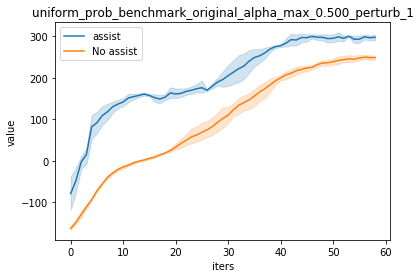

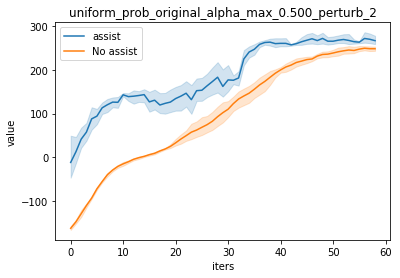

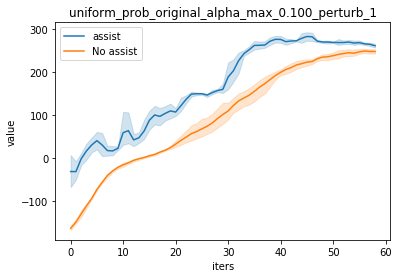

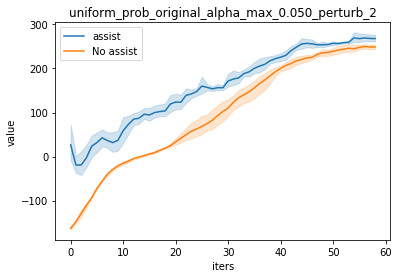

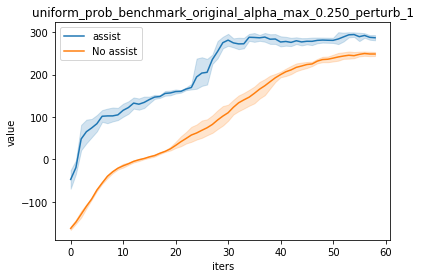

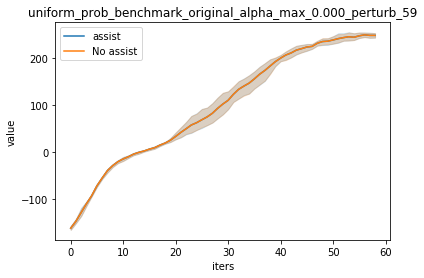

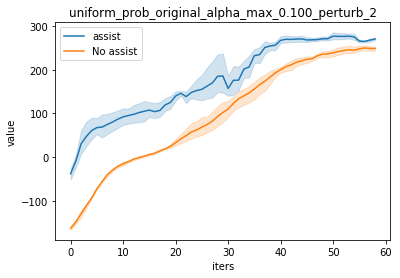

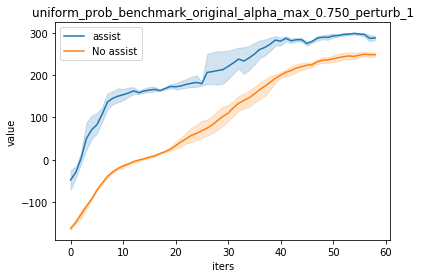

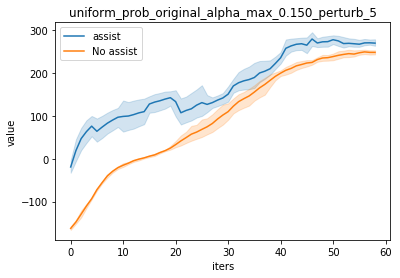

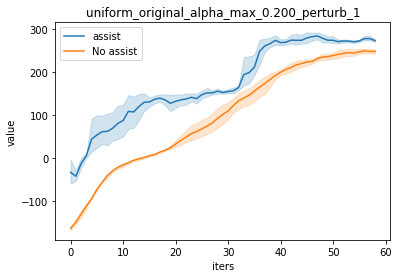

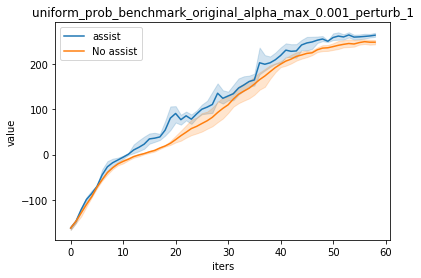

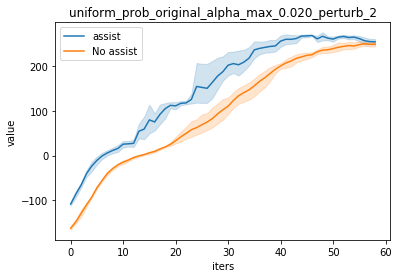

In [58]:
for rr in r: 
    prod_plots(rr, key='episode_reward_mean')